# Tutorial 1b: Exploratory data analysis

*This tutorial was generated from an Jupyter notebook.  You can download the notebook [here](t1b_exploratory_data_analysis.ipynb).*


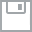
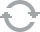
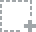
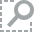
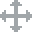
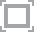
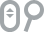
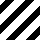
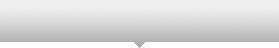
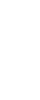
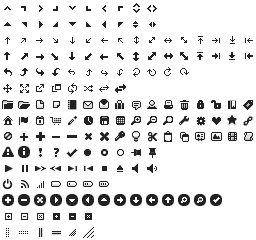
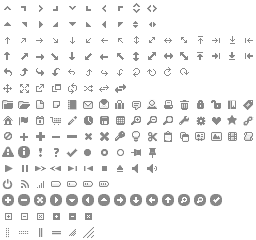
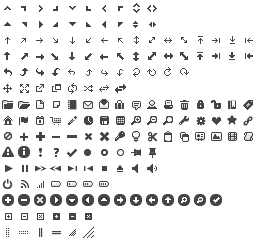
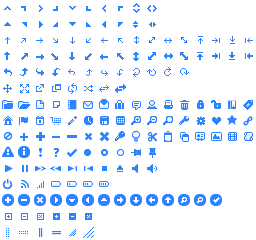
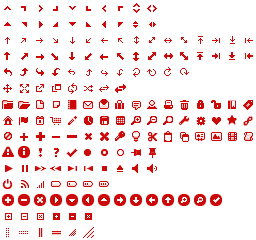
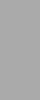
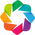
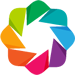

In [1]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# We'll use Pybeeswarm
import beeswarm as bs

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

In this tutorial, we will learn how to load data stored on disk into a Python data structure.  We will use `pandas` to read in CSV (comma separated value) files and store the results in the very hand Pandas `DataFrame`.  We will then "play" with the data to get a feel for it.  This process is called **exploratory data analysis**, a term coined by John Tukey, and is an important first step in analysis of a data set.

The data set we will use comes from a fun paper about the adhesive properties of frog tongues.  The reference is Kleinteich and Gorb, Tongue adhesion in the horned frog *Ceratophrys sp.*, *Sci. Rep.*, **4**, 5225, 2014.  You can download the paper [here](http://bebi103.calech.edu/2014/protected/papers/kleinteich_2014.pdf).  You might also want to check out a *New York Times* feature on the paper [here](http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html).

In this paper, the authors investigated various properties of the adhesive characteristics of the tongues of horned frogs when they strike prey.  The authors had a striking pad connected to a cantilever to measure forces.  They also used high speed cameras to capture the strike and record relevant data.

## Importing modules

As I mentioned in the last tutorial, we need to import modules we need for data analysis.  An important addition is Pandas, which we import as `pd`.  As is good practice, I import everything at the top of the document.

## The data file

The data from the paper are contained in the file `frog_tongue_adhesion.csv`, which you can download [here](http://bebi103.caltech.edu/2014/data/frog_tongue_adhesion.csv).  We can look at its contents.  You can use

    head -n 20 frog_tongue_adhesion.csv
from the command line, but I'll write a quick Python function to show the head of a file to do it here.

In [2]:
def head(file_name, n_lines):
    """Display first `n_lines` lines of file."""  
    with open(file_name, 'r') as f:
        i = 0
        line = f.readline().rstrip()
        while line != '' and i < n_lines:
            line = f.readline().rstrip()
            print(line)
            i += 1
            
# Use our handy f
head('../data/kleinteich_and_gorb/frog_tongue_adhesion.csv', 20)

#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / con

The first lines all begin with `#` signs, signifying that they are comments and not data.  They do give important information, though, such as the meaning of the ID data.  The ID refers to which specific frog was tested.

Immediately after the comments, we have a row of comma-separated headers.  This row sets the number of columns in this data set and labels the meaning of the columns.  So, we see that the first column is the date of the experiment, the second column is the ID of the frog, the third is the trial number, and so on.

After this row, each row repesents a single experiment where the frog struck the target.

CSV files are generally a good way to store data.  Commas make better delimiters than white space (such as tabs) because they have no portability issues.  Delimiter collision is avoided by putting the data fields in double quotes when necessary.  There are other good ways to store data, such as [JSON](http://json.org), but we will almost exclusively use CSV files in this class.

## Loading a data set

We will use `pd.read_csv()` to load the data set.  The data are stored in a **DataFrame**, which is one of the data types that makes `pandas` so convenient for use in data analysis.  `DataFrame`s offer mixed data types, including incomplete columns, and convenient slicing, among many, many other convenient features.  We will use the `DataFrame` to look at the data, at the same time demonstrating some of the power of `DataFrame`s.  They are like spreadsheets, only a lot better.

We will now load the `DataFrame`.  On my machine, the data are stored in the file `../data/kleinteich_and_gorb/frog_tongue_adhesion.csv`.

In [3]:
# Use pd.read_csv() to read in the data and store in a DataFrame
fname = '../data/kleinteich_and_gorb/frog_tongue_adhesion.csv'
df = pd.read_csv(fname, comment='#')

Notice that we used the kwarg `comment` to specify that lines that begin with `#` are comments and are to be ignored.  If you check out the doc string for `pd.read_csv`, you will see there are *lots* of options for reading in the data.

## Exploring the DataFrame

Let's jump right in and look at the contents of the `DataFrame`.  We can look at the first several rows using the `df.head()` method.

In [4]:
# Look at the contents (first 10 indices)
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


We see that the column headings were automatically assigned.  `pandas` also automatically defined the indices (names of the rows) as integers going up from zero.  We could have defined the indices to be any of the columns of data.

To access a column of data, we use the following syntax.

In [5]:
# Slicing a column out of a DataFrame is achieved by using the column name
df['impact force (mN)']

0     1205
1     2527
2     1745
3     1556
4      493
5     2276
6      556
7     1928
8     2641
9     1897
10    1891
11    1545
12    1307
13    1692
14    1543
15    1282
16     775
17    2032
18    1240
19     473
20    1612
21     605
22     327
23     946
24     541
25    1539
26     529
27     628
28    1453
29     297
      ... 
50     458
51     626
52     621
53     544
54     535
55     385
56     401
57     614
58     665
59     488
60     172
61     142
62      37
63     453
64     355
65      22
66     502
67     273
68     720
69     582
70     198
71     198
72     597
73     516
74     815
75     402
76     605
77     711
78     614
79     468
Name: impact force (mN), dtype: int64

The indexing of the rows is preserved, and we can see that we can easily extract all of the impact forces.  Note, though, that `pd.read_csv()` interpreted the data to be integer (`dtype = int64`), so we may want to convert these to floats.

In [6]:
# Use df.astype() method to convert it to a NumPy float64 data type.
df['impact force (mN)'] = df['impact force (mN)'].astype(np.float64)

# Check that it worked
print('dtype = ', df['impact force (mN)'].dtype)

dtype =  float64


Now let's say we only want the impact force of strikes above one Newton.  Pandas `DataFrame`s can conveniently be sliced with Booleans.

In [7]:
# Generate True/False array of rows for indexing
inds = df['impact force (mN)'] > 1000.0

# Slice out rows we want (big force rows)
df_big_force = df[inds]

# Let's look at it; there will be only a few high-force values
df_big_force

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
5,2013_03_01,I,4,2276,31,3.68,-592,969,0.96,-0.176,341,106,0.69,6676,-1737
7,2013_03_05,I,2,1928,46,3.11,-804,508,1.30,-0.285,246,178,0.28,7832,-3266
8,2013_03_05,I,3,2641,50,4.27,-690,491,1.12,-0.239,269,224,0.17,9824,-2568
9,2013_03_05,I,4,1897,41,3.06,-462,839,0.75,-0.328,266,176,0.34,7122,-1733
10,2013_03_12,I,1,1891,40,3.06,-766,1069,1.24,-0.380,408,33,0.92,4638,-1879
11,2013_03_12,I,2,1545,48,2.50,-715,649,1.15,-0.298,141,112,0.21,10947,-5064


So now we only have the strikes of high force.  Note, though, that the original indexing of rows was retained!  In our new `DataFrame` with only the big force strikes, there is no index 4, for example.

In [8]:
# Executing the below will result in an exception
df_big_force['impact force (mN)'][4]

KeyError: 4

This might seem counterintuitive, but it is actually a good idea.  Remember, indices do not have to be integers!

There is a way around this, though.  We can use the `iloc` attribute of a `DataFrame`.  This gives indexing with sequential integers.  This is generally not advised, and I debated even showing this.

In [9]:
# Using iloc enables indexing by the corresponding sequence of integers
df_big_force['impact force (mN)'].iloc[4]

2276.0

## Tidy data
In our `DataFrame`, the data are **tidy**.  The concept of tidy data originally comes from development of databases, but has taken hold for more general data processing in recent years.  See [this paper](http://www.jstatsoft.org/article/view/v059i10) by Hadley Wickham for a great discussion of this.  Tidy data refers to data sets arranged in tabular form that have the following format.

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a separate table.

As we will see, structuring the data in this way allows for very easy access.  Furthermore, if you know a priori that a data set it tidy, there is little need for munging; you already know how to pull out what you need.

We will work on tidying messy data ("messy data" is anything that is not tidy)  next week.  For now, we will take advantage of the fact that Kleinteich and Korb generously provided us with tidy data.

## More data extraction
Given that the data are tidy and one row represents a single experiment, we might like to extract a row and see all of the measured quantities from a given strike.  This is also very easy with `DataFrame`s using their `ix` attribute.

In [10]:
# Let's slice out experiment with index 42
exp_42 = df.ix[42]

# And now let's look at it
exp_42

date                                                    2013_05_27
ID                                                             III
trial number                                                     3
impact force (mN)                                              324
impact time (ms)                                               105
impact force / body weight                                    2.61
adhesive force (mN)                                           -172
time frog pulls on target (ms)                                 619
adhesive force / body weight                                  1.38
adhesive impulse (N-s)                                      -0.079
total contact area (mm2)                                        55
contact area without mucus (mm2)                                23
contact area with mucus / contact area without mucus          0.37
contact pressure (Pa)                                         5946
adhesive strength (Pa)                                       -

Notice how clever the `DataFrame` is.  We sliced a row out, and now the indices describing its elements are the column headings.  This is a Pandas `Series` object.

Now, slicing out index `42` is not very meaningful because the indices are arbitrary.  Instead, we might look at our lab notebook, and want to look at trial number 3 on May 27, 2013, of frog III.  This is a more common, and indeed meaningful, use case.

In [11]:
# Set up Boolean slicing
date = df['date'] == '2013_05_27'
trial = df['trial number'] == 3
ID = df['ID'] == 'III'

# Slide out the row
df.ix[date & trial & ID]

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
42,2013_05_27,III,3,324,105,2.61,-172,619,1.38,-0.079,55,23,0.37,5946,-3149


The difference here is that the returned slice is a `DataFrame` and not a `Series`.  We can easily make it a `Series` using `iloc`.  Note that in most use cases, this is just a matter of convenience for viewing and nothing more.

In [12]:
df.ix[date & trial & ID].iloc[0]

date                                                    2013_05_27
ID                                                             III
trial number                                                     3
impact force (mN)                                              324
impact time (ms)                                               105
impact force / body weight                                    2.61
adhesive force (mN)                                           -172
time frog pulls on target (ms)                                 619
adhesive force / body weight                                  1.38
adhesive impulse (N-s)                                      -0.079
total contact area (mm2)                                        55
contact area without mucus (mm2)                                23
contact area with mucus / contact area without mucus          0.37
contact pressure (Pa)                                         5946
adhesive strength (Pa)                                       -

You may take issue with the rather lengthy syntax of access column names.  I.e., if you were trying to access the ratio of the contact area with mucus to the contact area without mucus for trial number 3 on May 27, 2013, you would do the following.

In [13]:
# Set up criteria for our seach of the DataFrame
date = df['date'] == '2013_05_27'
trial = df['trial number'] == 3
ID = df['ID'] == 'III'

# When indexing DataFrames, use & for Boolean and (and | for or; ~ for not)
df['contact area with mucus / contact area without mucus'][date & trial & ID]

42    0.37
Name: contact area with mucus / contact area without mucus, dtype: float64

That syntax can be annoying.  But many would argue that this is preferred because there is no ambiguity about what you are asking for.  However, you may want to use shorter names.  Conveniently, when your column names do not have spaces, you can use attribute access.  For example....

In [14]:
# Attribute access
df.date[:10]

0    2013_02_26
1    2013_02_26
2    2013_03_01
3    2013_03_01
4    2013_03_01
5    2013_03_01
6    2013_03_05
7    2013_03_05
8    2013_03_05
9    2013_03_05
Name: date, dtype: object

Attribute access is really for convenience and is not the default, but if can make writing the code much less cumbersome.  So, let's change the name of the colums as

    'trial number' → 'trial'
    'contact area with mucus / contact area without mucus' → 'ca_ratio'

`DataFrame`s have a nice `rename` method to do this.

In [15]:
# Make a dictionary to rename columns
rename_dict = {'trial number' : 'trial',
        'contact area with mucus / contact area without mucus' : 'ca_ratio'}

# Rename the columns
df = df.rename(columns=rename_dict)

# Try out our new column name
df.ca_ratio[42]

0.37

Notice that we have introduced a new Python data structure, the **dictionary**.  A dictionary is a collection of objects, each one with a **key** to use for indexing.  For example, in `rename_dict`, we could get what we wanted to rename `'trial number'`.

In [16]:
# Indexing of dictionaries looks syntactially similar to cols in DataFrames
rename_dict['trial number']

'trial'

We can go on and on about indexing Pandas `DataFrame`s, because there are *many* ways to do it.  For much more on all of the clever ways you can access data and subsets thereof in DataFrames, see the [`pandas` docs on indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

However, if our data are tidy, there is really no need to go beyond what we have done here.  You really only need to generate Boolean querying arrays for tidy data, and you get a tidy data structure out that has exactly what you want.  So, we will not really go any more into indexing in the course, except where needed to make data tidy.

## "Playing" with data: an important part of data analysis

"Exploratory data analysis" is the time during data analysis where you explore your data.  You look at numbers, plot various quantities, and think about what analysis techniques you would like to use.  `pandas` DataFrames help you do this.

As we go through the interactive analysis, we will learn about syntax for various `matplotlib` plot styles.

The first thing we'll do is look at strike forces.  We'll rename the column for impact force for convenient attribute access because we'll access it many times.

In [17]:
df = df.rename(columns={'impact force (mN)': 'impf'})

Now, let's start plotting the impact forces to see what we're dealing with.  We'll start with the most naive plot.

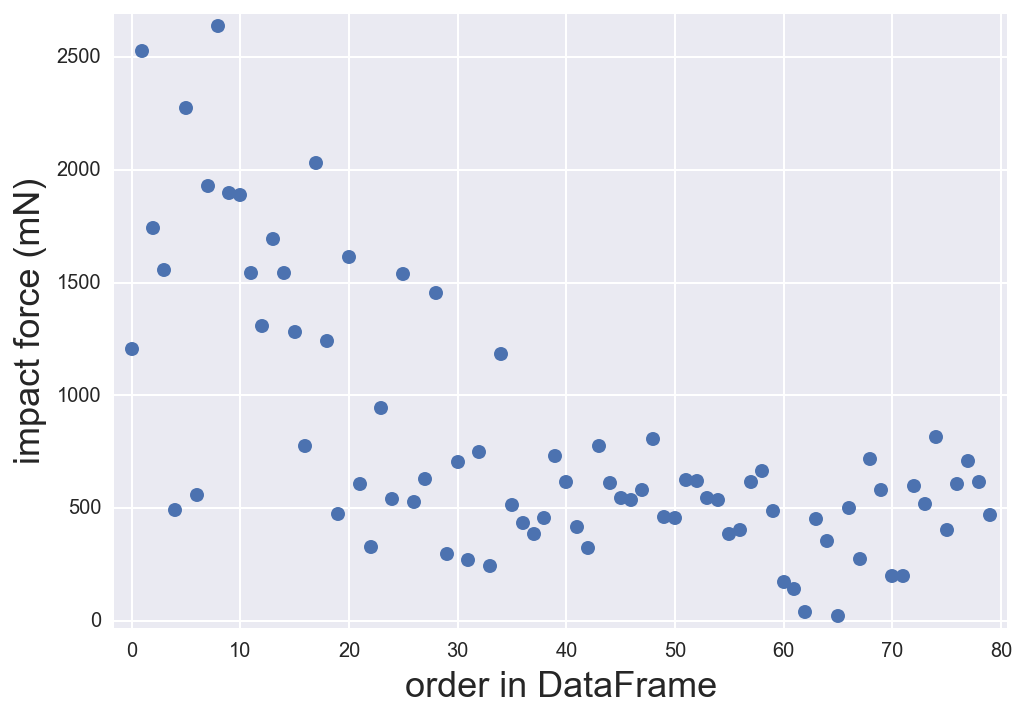

In [18]:
# Just make a scatter plot of forces
plt.plot(df.impf, 'o')
plt.margins(0.02)
plt.xlabel('order in DataFrame')
plt.ylabel('impact force (mN)')

The $x$-axis is pretty meaningless.  So, instead let's plot a histogram of impact forces.

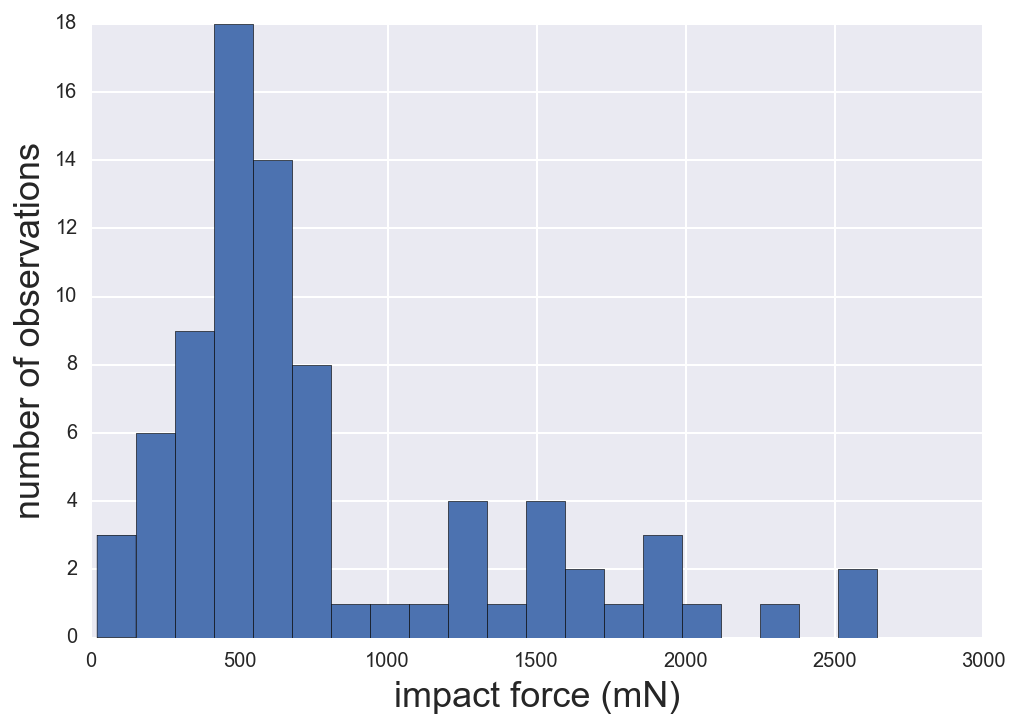

In [19]:
# Make a histogram plot; bins kwarg gives the number of bars
_ = plt.hist(df.impf, bins=20, normed=False)
plt.xlabel('impact force (mN)')
plt.ylabel('number of observations')

This is a better way to look at the impact force measurements.  We see that there are a few high-force impacts, but that most of the impacts are about 500 mN or so.


This is still only part of the story.  We would like to know how the impacts vary from frog to frog.  First, let's see how many trials we have for each frog.

In [20]:
# This is a fancy way to do string formatting; unnecessary, but nice
print("""
Frog ID      Number of samples
=======      =================
   I               {0:d}
  II               {1:d}
 III               {2:d}
  IV               {3:d}
""".format(df.ID[df.ID=='I'].count(), df.ID[df.ID=='II'].count(),
           df.ID[df.ID=='III'].count(), df.ID[df.ID=='IV'].count()))


Frog ID      Number of samples
=======      =================
   I               20
  II               20
 III               20
  IV               20



So, we only have 20 samples for each frog.  That's a bit few to construct a meaningful histogram for each frog.  So, maybe we can make a bar graph showing the mean and standard deviation of each sample.

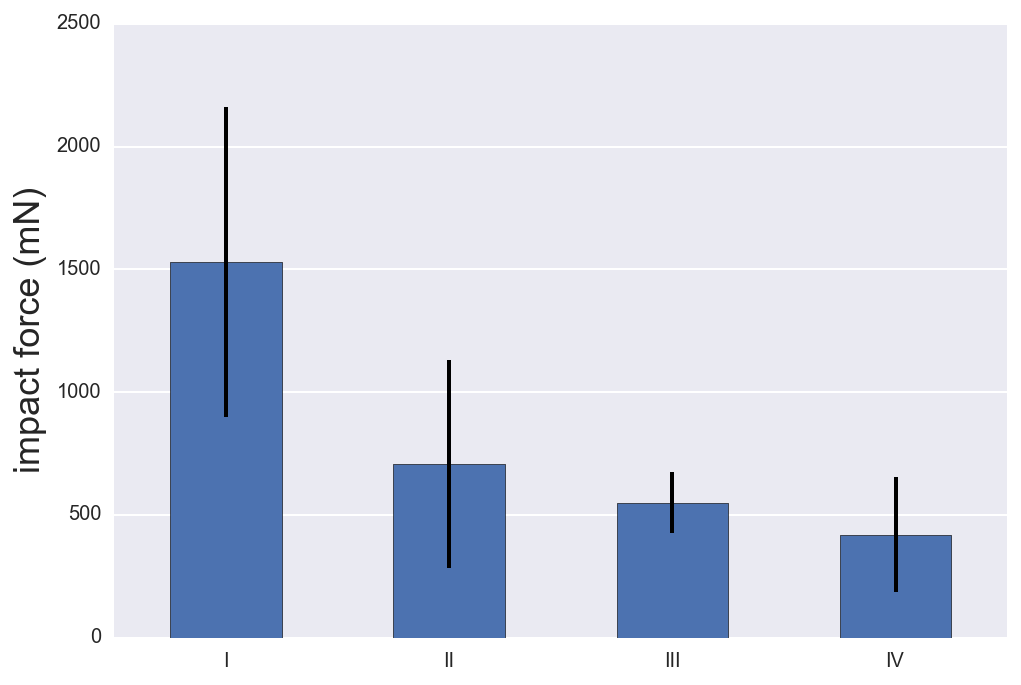

In [21]:
# Compute the mean impacts
mean_impacts = df.groupby('ID').impf.mean()

# We will use standard deviation as error bar
# Default DataFrame std is normalized by N-1; more on that in lecture
std_impacts = df.groupby('ID').impf.std()

# Bar locations
x = np.arange(4)

# Bar widths
bar_width = 0.5

# How to label each bar
bar_labels = df.ID.unique()

# We use matplotlib's bar function to make plot
plt.bar(x, mean_impacts, yerr=std_impacts, width=bar_width, align='center',
        error_kw={'ecolor' : 'black'})
plt.grid(axis='x')
plt.xticks(x, bar_labels)
plt.ylabel('impact force (mN)')

Note that we used the `groupby()` method to generate our means and standard deviations for the bar graph.  This is a very useful method, especially when your data are tidy.  Calling `df.groupby(col)` groups the `DataFrame` into what are effectively new `DataFrames` in which all of the entries for `col` are the same.  This allows us to compute the means and standard deviations for *each* frog.

I had you do the plot that way because I want you to get comfortable with `matplotlib`, which is really diverse in its uses.  However, you can make essentially the same figure in one or two lines using some of the awesomeness of `DataFrame`s.

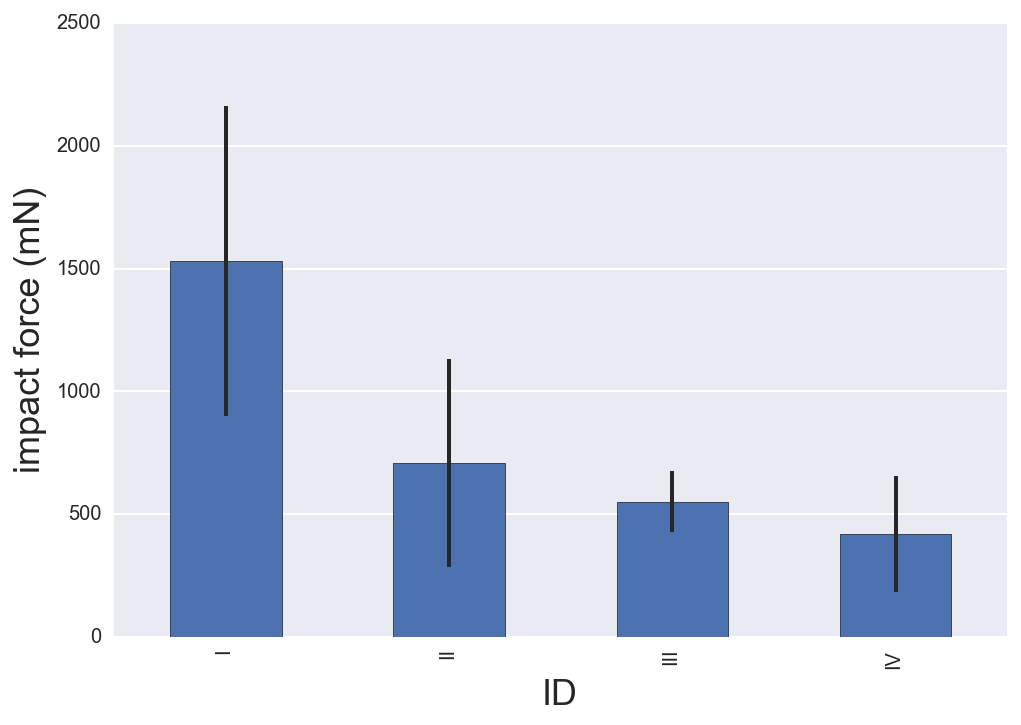

In [22]:
# Compute standard deviations grouped by ID
yerr = df.groupby('ID').impf.std()

# Plot the bar graphs
ax = df.groupby('ID').impf.mean().plot(kind='bar', yerr=yerr)
ax.grid(axis='x')
ax.set_ylabel('impact force (mN)')

Actually, I only showed this result to show you the `groupby()` and `plot()` method of `DataFrame`s.  Actually, it is my opinion that....

## Bar graphs are seldom a good way to show results
There.  I said it.  Despite their prevalence throughout biological literature, I generally think bar charts are seldom a good way to show results.  They are difficult to read, and often show little information.  A better alternative is a box plot.  Better still are **jitter** or **beeswarm** plots, which I wil show below.

### Box plots
There are many formats for box plots, and Seaborn employs what seems to be from my experience the most common.  (Matplotlib boxplots are by default very ugly, which is why we'll directly use Seaborn to make the plots.)  Note that the `DataFrame` must be tidy for Seaborn to make the box plot.  

First, we'll make a plot, and then I'll describe what it means.

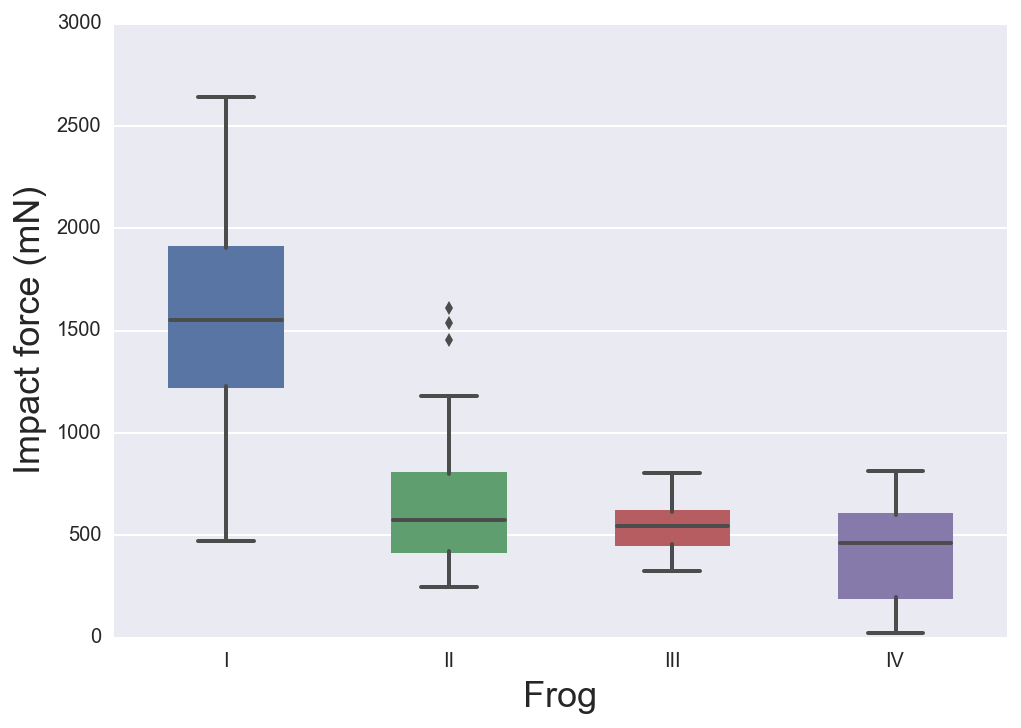

In [23]:
# Use Seaborn to make box plot
ax = sns.boxplot(x='ID', y='impf', data=df, width=0.5)

# Relabel axes
ax.set_xlabel('Frog')
ax.set_ylabel('Impact force (mN)')

The middle line in a box gives the median of the measurements.  The bottom and top of the box are the 25th and 75th percentile values, called the first and third **quartile**, respectively.  The extrema on the whiskers represent the minimum and maximum values of the data, outliers excluded. Outliers, in this case, are denoted with pluses.
How are outliers defined? Typically, for box plots, an outliers is defined as follows. The total length of the box is called the interquartile range (IQR), going from the first to the third quartile (Q1 and Q3, respectively). I.e., $\text{IQR} = \text{Q3} − \text{Q1}$.  A datum is an outlier if its value $x$ satisfies

\begin{align}
&x < \text{Q1} −\frac{3}{2}\,\text{IQR},\\
\text{or } &x > \text{Q3}+\frac{3}{2}\,\text{IQR}.
\end{align}

The factor of $3/2$ is sometimes changed to 3 to denote extreme outliers, and this can be adjusted with the `whis` keyword argument to `sns.boxplot()`.  Any points outside of the range of the whiskers are plotted explicitly and considered to be outliers.

### Jitter and beeswarm plots
We only have 20 measurements for each frog.  Wouldn't it be better just to plot all 20 instead of trying to distill it down to a mean and a standard deviation in the bar graph or quartiles in a box plot?  After all, the impact force measurements might not be Gaussian distributed; they may be bimodal or something else.  So, we would like to generate a column scatter plot.  We will plot each data point for each frog in a column, and "jitter" its position along the $x$-axis.  We make the points somewhat transparent to allow visualization of overlap.  This is accomplished using Seaborn's `stripplot()` function.

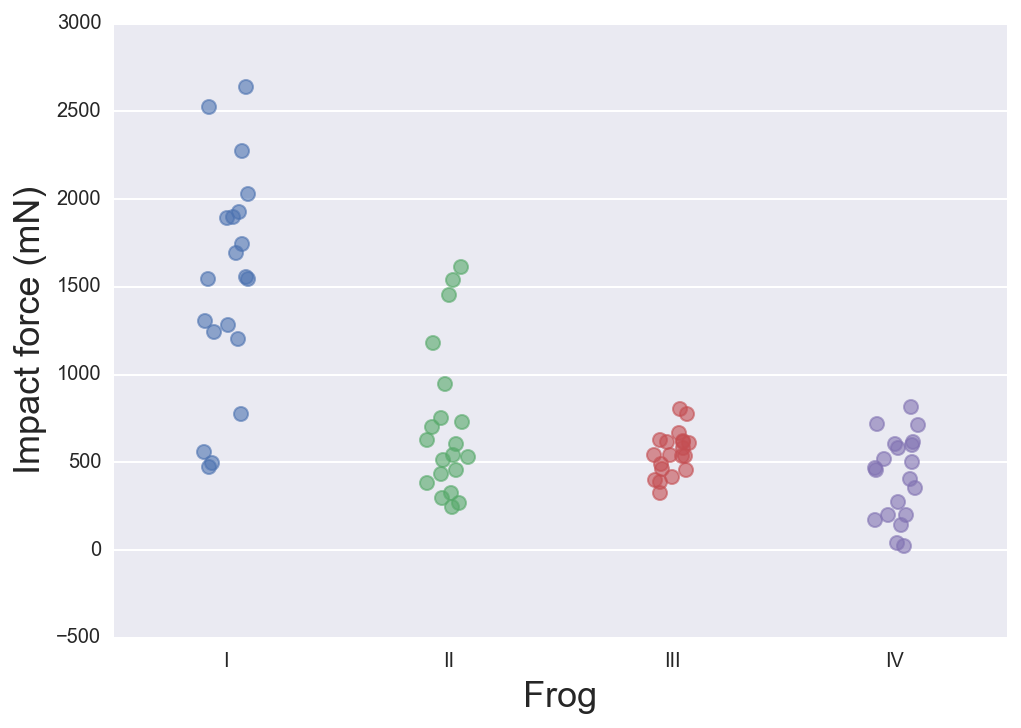

In [24]:
# Make the jitter plot
ax = sns.stripplot(x='ID', y='impf', data=df, jitter=True, alpha=0.6)

# Relabel axes
ax.set_xlabel('Frog')
ax.set_ylabel('Impact force (mN)')

Very nice!  Now we can see that frog I, an adult, strikes with a wide range of impact forces, and can strike really hard.  Frog II, also an adult, tends to strike at around 500 mN, but occassionally will strike harder.  Juvenile frog III is a pretty consistent striker, while frog IV can have some pretty weak strikes.

The column scatter plot is not difficult to look at.  The informational content of the data does not need to be distilled into a box and whisker and certainly not a bar with a standard deviation.  For large data sets, in my experience when the number of data points are above about 200, it is useful to also include the box plot with the jitter plot.  This is also easily done with Seaborn.

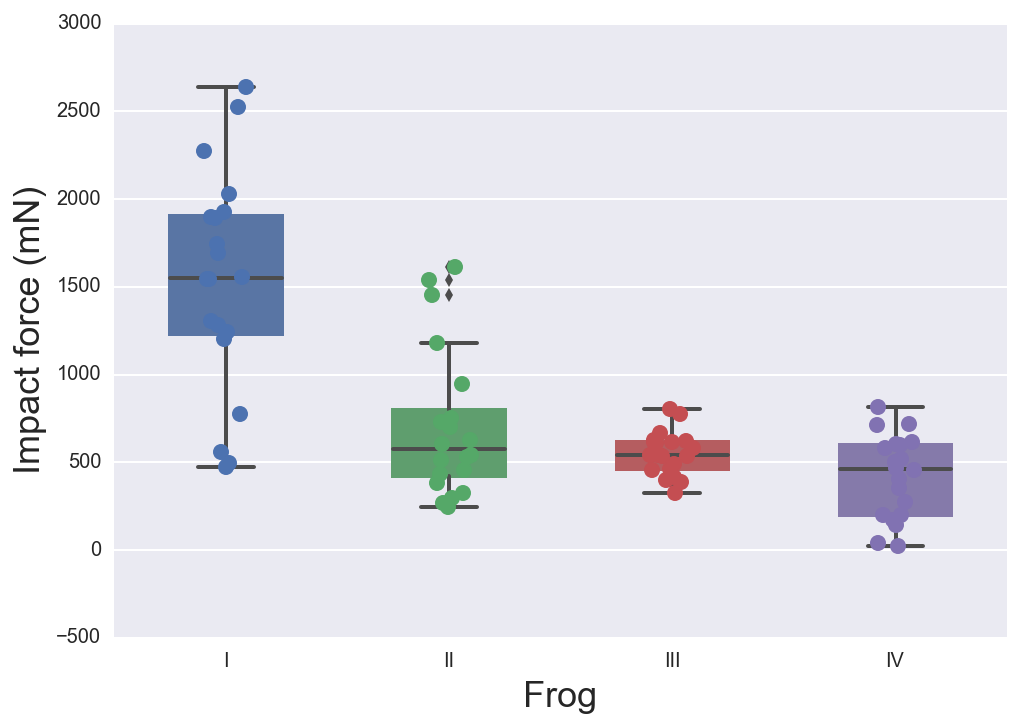

In [32]:
# Use Seaborn to make box plot
ax = sns.boxplot(x='ID', y='impf', data=df, width=0.5)

# Make the jitter plot
ax = sns.stripplot(x='ID', y='impf', data=df, jitter=True, marker='o',
                  edgecolor='white')

# Relabel axes
ax.set_xlabel('Frog')
ax.set_ylabel('Impact force (mN)')

plt.savefig('test.pdf')

Plots like jitter plots in which the dots to not overlap are called **beeswarm** plots.  For large numbers of data points, these are not favored over the jitter, but for small numbers of data points (less than 200 is a good rule of thumb), beeswarm plots tend to be easier to read, as each data point can be clearly seen.  Unfortunately, `matplotlib` and `seaborn` do not natively have a clean way of doing this.  It is definitely possible, but is cumbersome.

Fortunately, there is a package to do it, [pybeeswarm](https://pip.pypa.io/en/latest/), written by Melissa Gyrmek.  You should have installed it when you did [Tutorial 0a](t0a_python_for_scientific_computing.html).  We have to build a list of date points for each category by hand, since `pybeeswarm` does not use the `groupby()` functionality of `DataFrame`s under the hood.

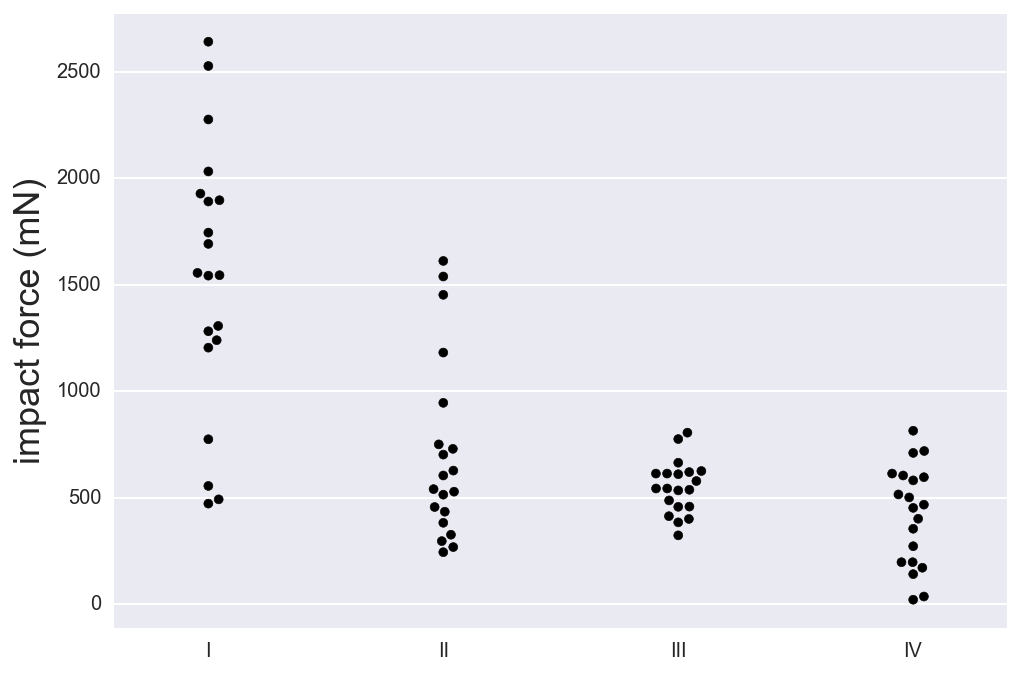

In [33]:
# Separate impact forces by frog
list_of_impfs = [df.impf[df.ID=='I'], df.impf[df.ID=='II'],
                 df.impf[df.ID=='III'], df.impf[df.ID=='IV']]

# Generate a beeswarm plot
_ = bs.beeswarm(list_of_impfs, labels=['I', 'II', 'III', 'IV'])
plt.grid(axis='x')
plt.ylabel('impact force (mN)')

We can get even more information.  We might be interested to see if the variability in impact force is day-to-day or time-independent.  So, we would like to make the beeswarm plot with different colors on different days.  This requires a bit more code, but it is not too bad.  (As is the case in many of the examples in the tutorials, there is likely a more concise way to do this.)

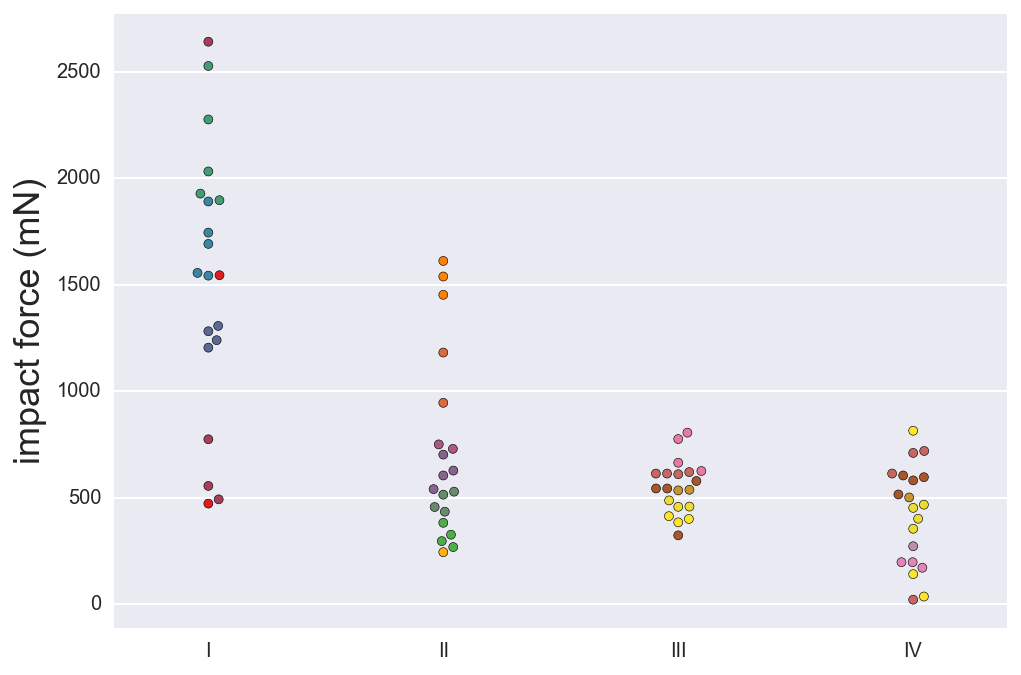

In [34]:
# Get list of dates; the unique method from a DataFrame works well
dates = df.date.unique()

# Number of unique dates
n_dates = len(dates)

# Assign colors to date names, calling colormap with value between 0 and 1
# We will use the qualitative colormap "Set1."
colors = []
for i in range(n_dates):
    colors.append(plt.cm.Set1(float(i) / float(n_dates)))
    
# Make a dictionary of dates and colors
color_dict = dict(zip(dates, colors))

# Sort the DataFrame by ID to make sure color labels are in correct order
# in the beeswarm plot
df_sorted = df.sort('ID')

# Make a list of colors
colors = []
for i in range(len(df)):
    colors.append(color_dict[df_sorted.date.iloc[i]])

# Make beeswarm with date coloring
bs_plot, ax = bs.beeswarm(list_of_impfs, labels=['I', 'II', 'III', 'IV'],
                          col=colors)
plt.grid(axis='x')
plt.ylabel('impact force (mN)')

We do see some clustering of colors, so there may be some correlation between the day of the measurement and the impact force of the frog's tongue.  I am careful to say *may* be some correlation, since we have not carefully quantified it.

Now let's look at correlations.  We may be curious: does a hard strike result in better adhesion?  We can plot the adhesive force versus the impact force.

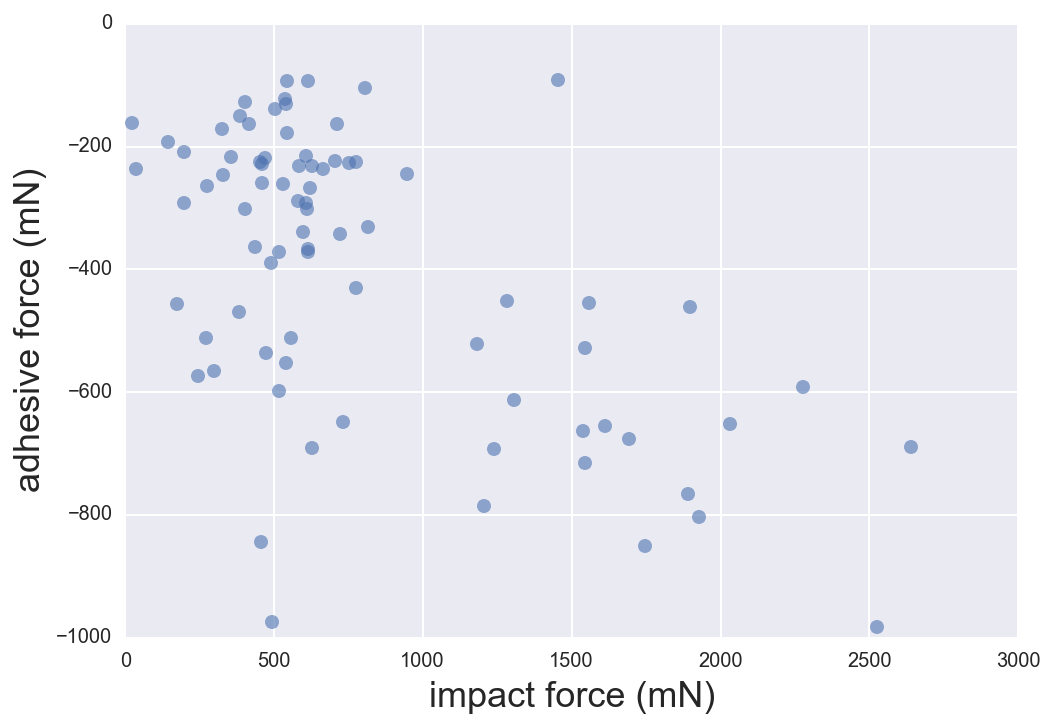

In [35]:
# Rename the column for convenience in future use
df.rename(columns={'adhesive force (mN)' : 'adhf'}, inplace=True)

# Plot adhesive force vs. impact force
plt.plot(df.impf, df.adhf, 'o', alpha=0.6)
plt.xlabel('impact force (mN)')
plt.ylabel('adhesive force (mN)')

Later in the course, we will learn how to do regressions to test the relationship between two variables.

## Conclusions

In this tutorial, we have learned how to load data from CSV files into Pandas `DataFrame`s.  `DataFrame`s are useful objects for looking at data from many angles.  Together with `matplotlib`, you can start to look at qualitative features of your data and think about how you will go about doing your detailed analysis.